In [115]:
pip install tensorflow


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.2.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-2.0.1-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached grpcio-1.76.0-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.13.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached h5py-3.15.1-cp313-cp313-win_amd64.whl.metadata (3.1 kB)
  Using cached ml_dtypes

In [141]:
# Importing important libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pickle

import warnings
warnings.filterwarnings('ignore')

In [167]:
# Importing the dataset 
df = pd.read_csv("C:/Users/muthu/Downloads/diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [168]:
#getting rows and columns
df.shape

(53940, 10)

In [169]:
#Getting an idea about null values
df.isnull().sum().any()

np.False_

In [170]:
# Getting an idea whether there are any duplicates in the data or not 
df.duplicated().sum()

np.int64(146)

In [171]:
#drop the duplicates
diamond = df.drop_duplicates()

In [172]:
diamond.shape

(53794, 10)

In [173]:
#getting idea about data types
diamond.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [174]:
# All the columns are in correct data types.

In [175]:
#IQR method(Check and handle outliers)

for col in ['carat','price', 'x','y','z']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    diamond = diamond[(diamond[col] >= lower) & (diamond[col] <= upper)]
    



In [176]:
# convert ruppes
INR_RATE = 89.5
diamond['price_inr'] = diamond['price'] * INR_RATE


In [177]:
# Check Skewness
diamond[['carat','price_inr','x','y','z']].skew()


carat        0.668018
price_inr    1.192511
x            0.220100
y            0.214993
z            0.218613
dtype: float64

In [178]:
# Apply transform if skew > 1

diamond['price_inr'] = np.log1p(diamond['price_inr'])



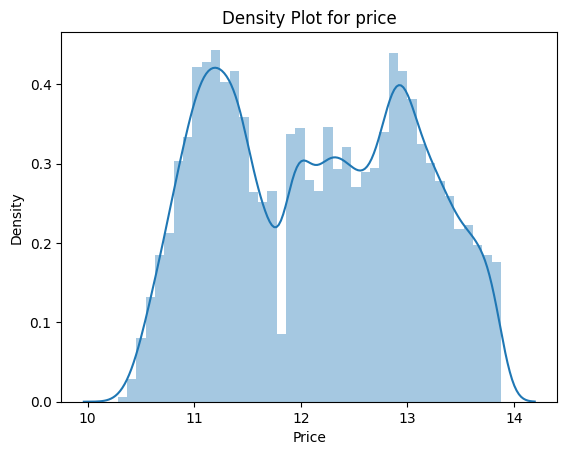

In [179]:
# EDA
#Distribution plot for price

sns.distplot(diamond['price_inr'])
plt.title('Density Plot for price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


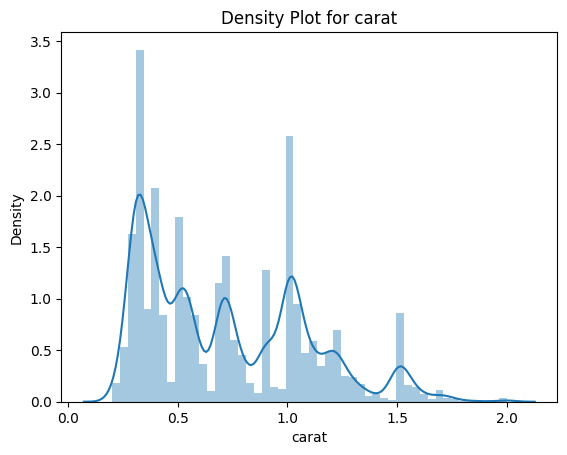

In [180]:

#Distribution plot for carat

sns.distplot(diamond['carat'])
plt.title('Density Plot for carat')
plt.xlabel('carat')
plt.ylabel('Density')
plt.show()


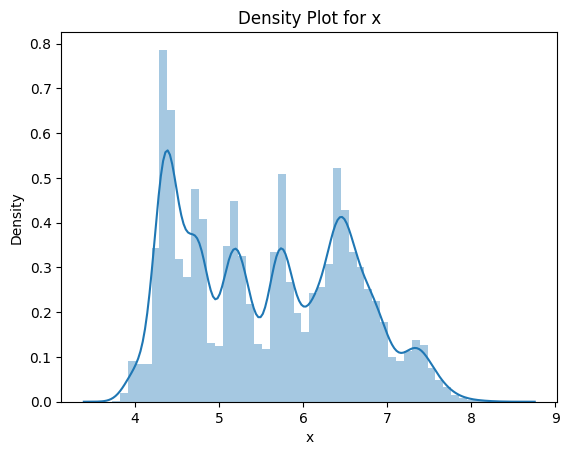

In [181]:

#Distribution plot for x,y,z

sns.distplot(diamond['x'])
plt.title('Density Plot for x')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()





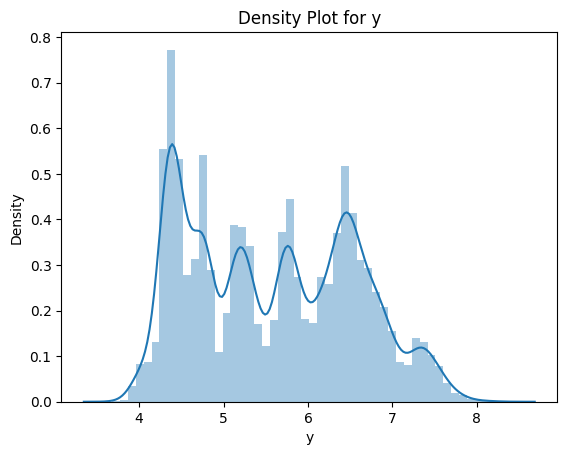

In [182]:
sns.distplot(diamond['y'])
plt.title('Density Plot for y')
plt.xlabel('y')
plt.ylabel('Density')
plt.show()


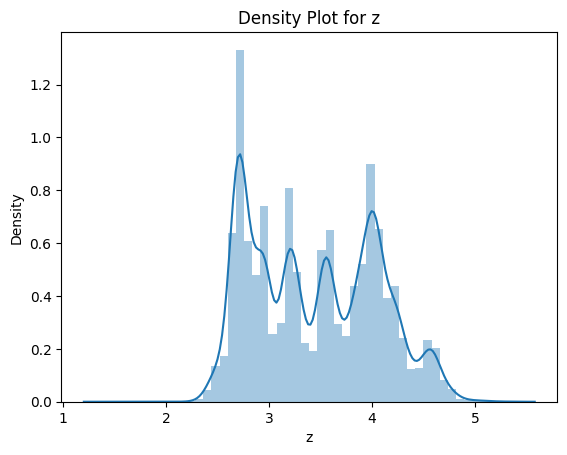

In [183]:
sns.distplot(diamond['z'])
plt.title('Density Plot for z')
plt.xlabel('z')
plt.ylabel('Density')
plt.show()






Text(0.5, 1.0, 'cut type')

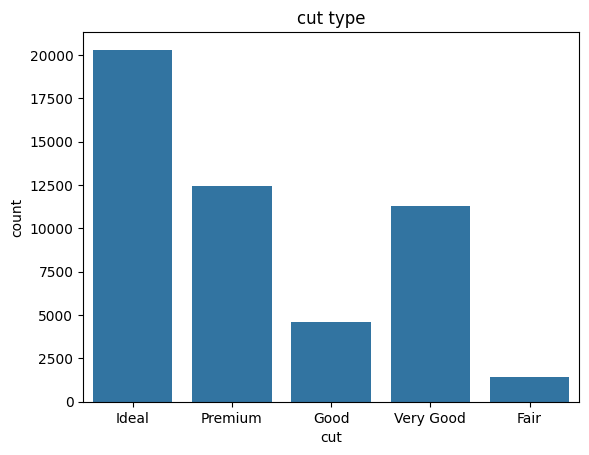

In [184]:
#countplot for catogorival values
sns.countplot(x='cut', data=diamond)
plt.title('cut type')


<Axes: xlabel='color', ylabel='count'>

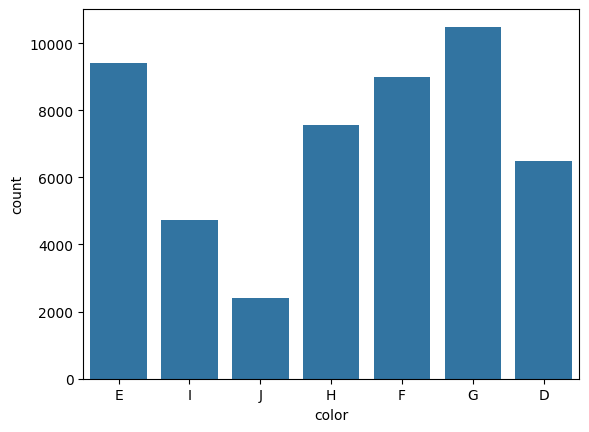

In [185]:
sns.countplot(x='color', data=diamond)


<Axes: xlabel='clarity', ylabel='count'>

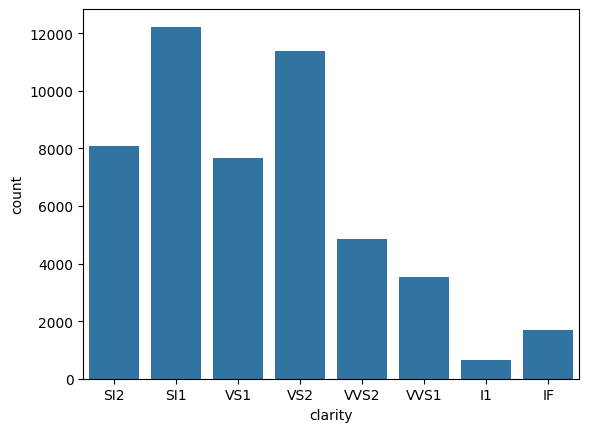

In [186]:
sns.countplot(x='clarity', data=diamond)


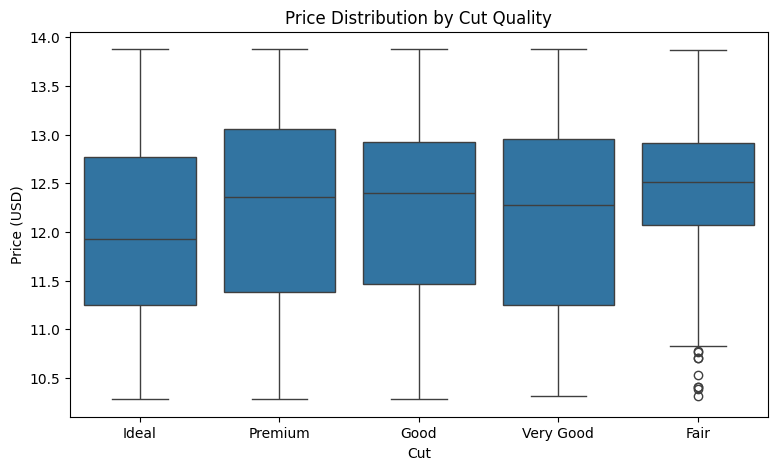

In [189]:
#Price variation with cut
plt.figure(figsize=(9, 5))
sns.boxplot(x='cut', y='price_inr', data=diamond)
plt.title("Price Distribution by Cut Quality")
plt.xlabel("Cut")
plt.ylabel("Price (USD)")
plt.show()


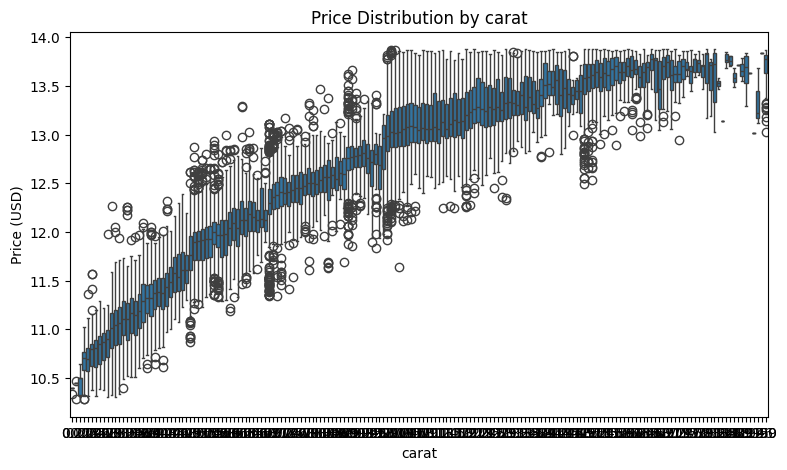

In [190]:
#Price variation with carat
plt.figure(figsize=(9, 5))
sns.boxplot(x='carat', y='price_inr', data=diamond)
plt.title("Price Distribution by carat")
plt.xlabel("carat")
plt.ylabel("Price (USD)")
plt.show()


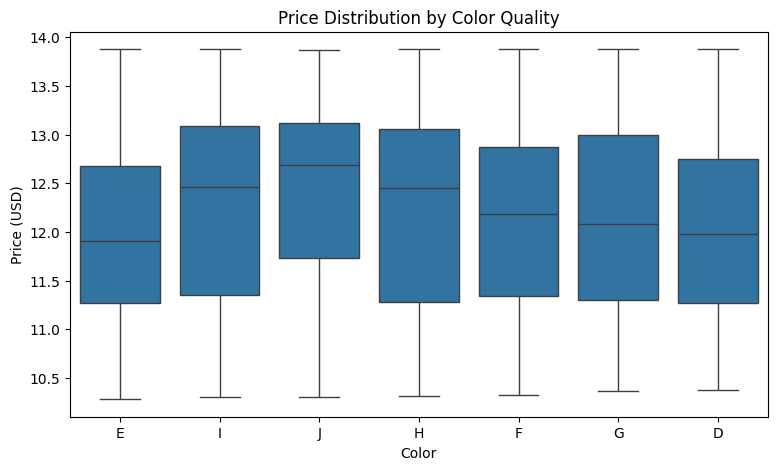

In [191]:
#Price variation with color
plt.figure(figsize=(9, 5))
sns.boxplot(x='color', y='price_inr', data=diamond)
plt.title("Price Distribution by Color Quality")
plt.xlabel("Color")
plt.ylabel("Price (USD)")
plt.show()


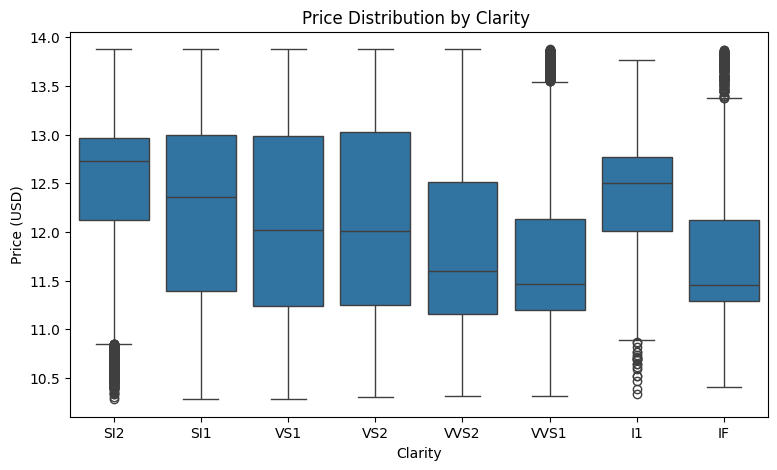

In [192]:
#Price variation with clarity
plt.figure(figsize=(9, 5))
sns.boxplot(x='clarity', y='price_inr', data=diamond)
plt.title("Price Distribution by Clarity ")
plt.xlabel("Clarity")
plt.ylabel("Price (USD)")
plt.show()


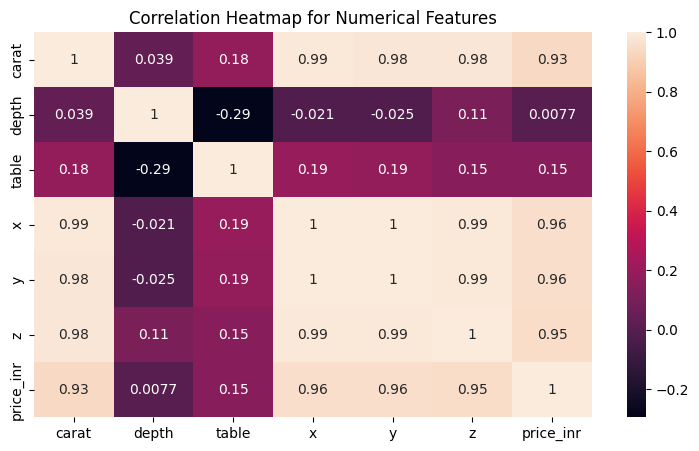

In [193]:

# Select only numerical columns
num_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price_inr']

# Compute correlation matrix
corr_matrix = diamond[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap for Numerical Features")
plt.show()


In [ ]:
# Carat has a very strong positive correlation with price — bigger stones cost more. This makes sense because carat weight is a primary price driver.
# Dimensions(x,y,z) are strong positive correlation with price and carat
#so we use carat or (x,y,z)
# Depth percentage and table does not have a meaningful relationship with price,carat.

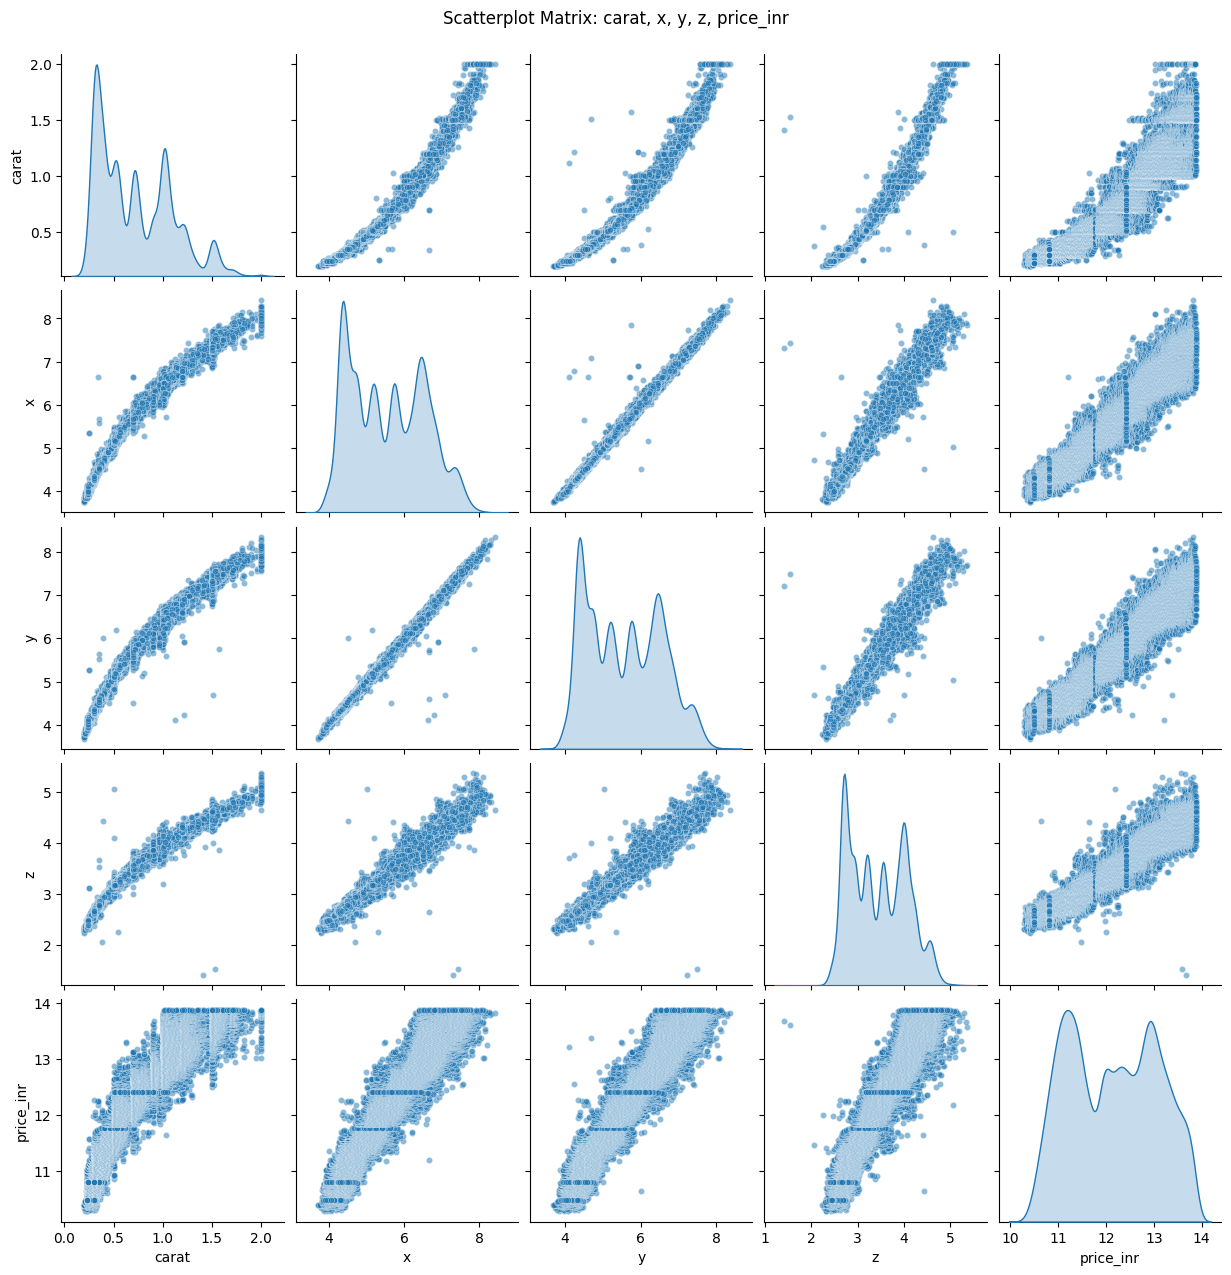

In [194]:

# Choose only relevant numerical columns
cols = ['carat','x','y','z','price_inr']

# Scatterplot Matrix
sns.pairplot(diamond[cols], diag_kind='kde', plot_kws={'alpha':0.5, 's':20})
plt.suptitle("Scatterplot Matrix: carat, x, y, z, price_inr", y=1.02)
plt.show()


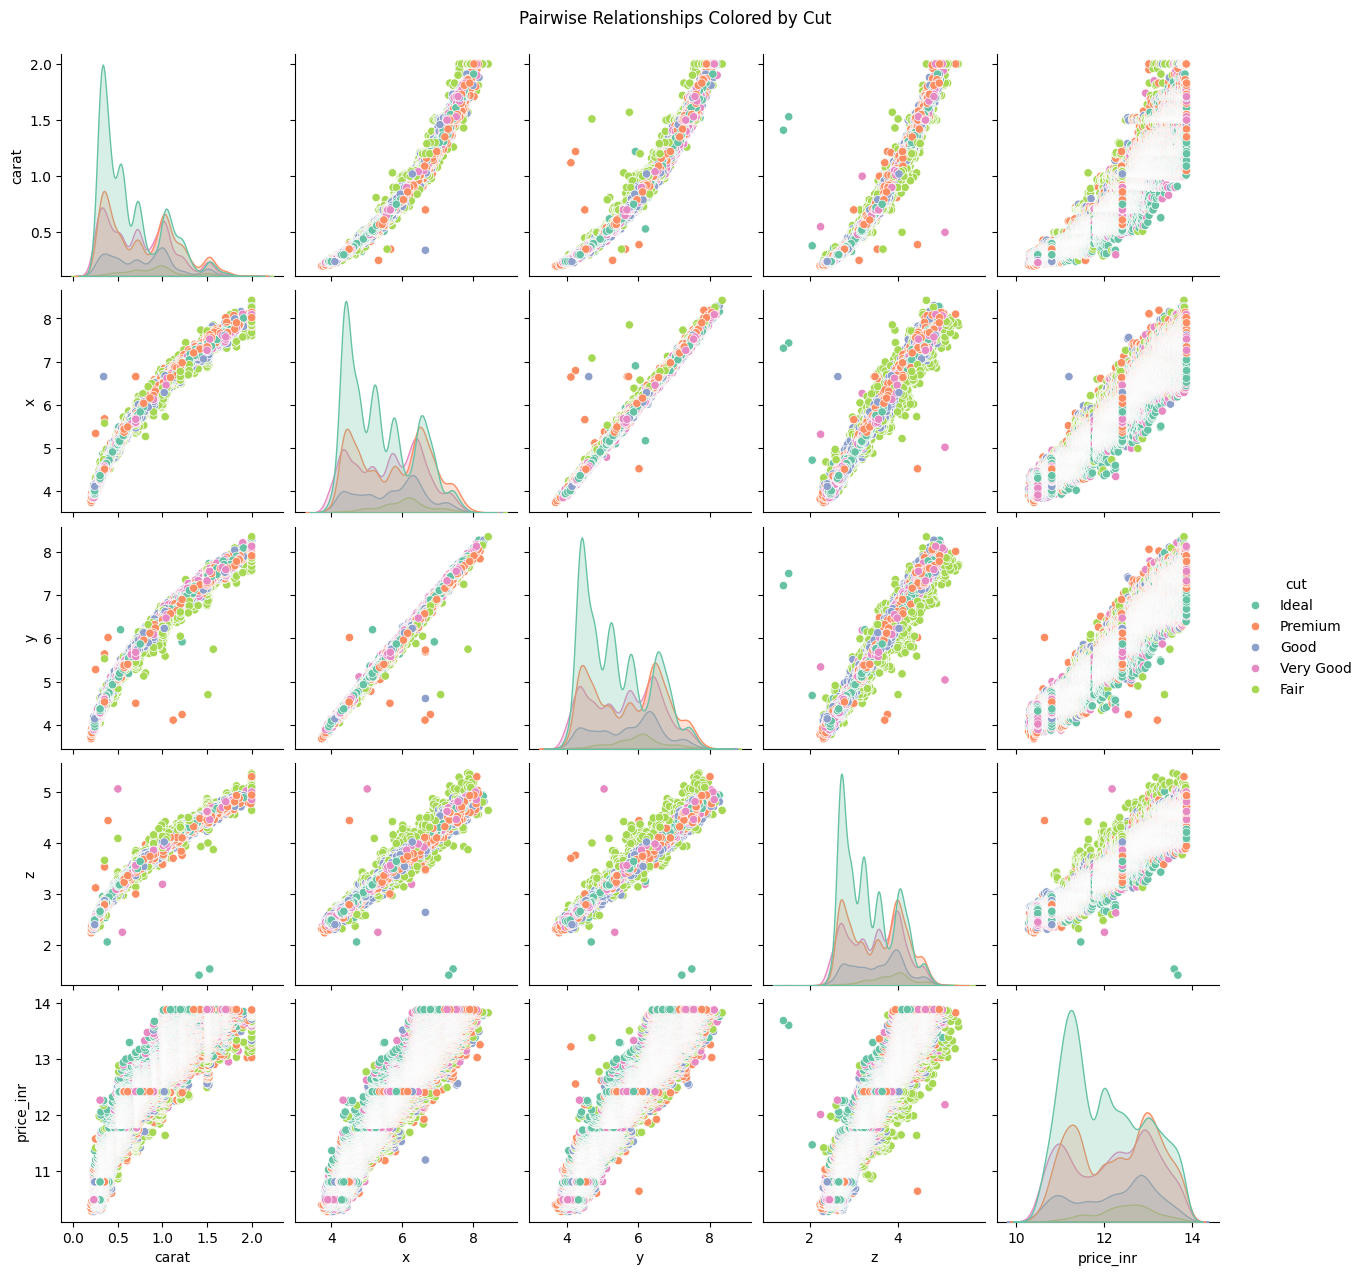

In [195]:
# pairwise relationship
sns.pairplot(diamond, vars=['carat','x','y','z','price_inr'], hue='cut', palette='Set2')
plt.suptitle("Pairwise Relationships Colored by Cut", y=1.02)
plt.show()


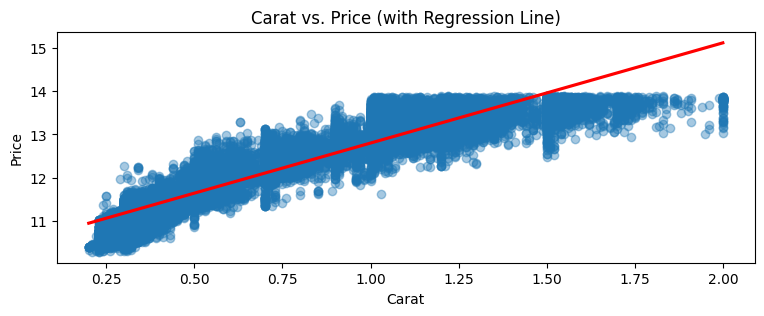

In [196]:
#carat vs price regression lineplot
plt.figure(figsize=(9,3))
sns.regplot(x='carat', y='price_inr', data=diamond, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title("Carat vs. Price (with Regression Line)")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()


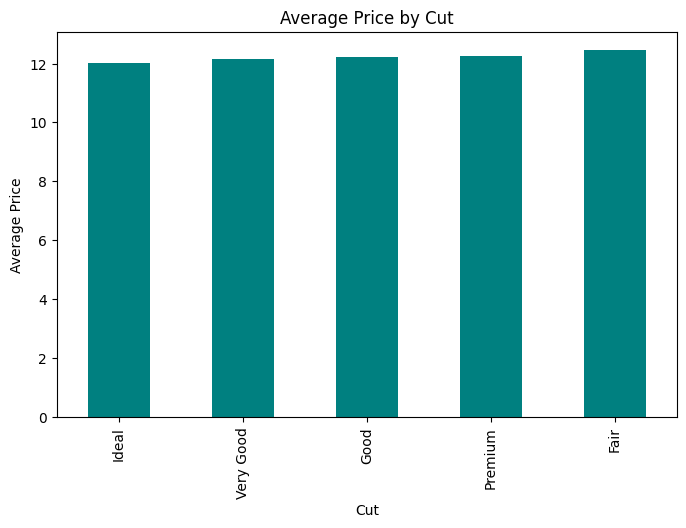

In [197]:
#Avg price by cut

plt.figure(figsize=(8,5))
diamond.groupby('cut')['price_inr'].mean().sort_values().plot(kind='bar', color='teal')
plt.title("Average Price by Cut")
plt.xlabel("Cut")
plt.ylabel("Average Price")
plt.show()


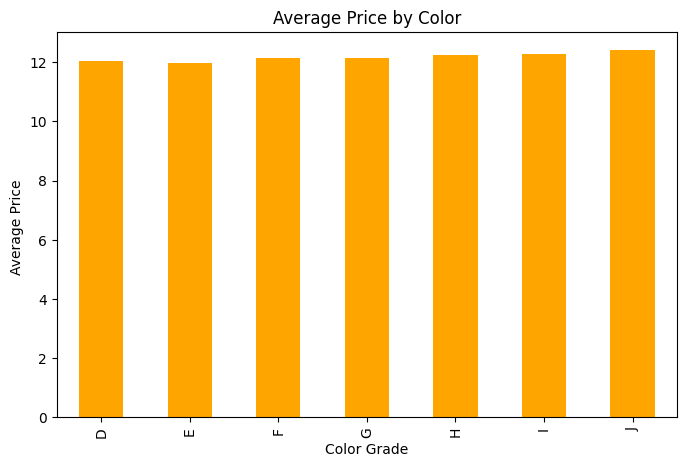

In [198]:
# Average price by color
plt.figure(figsize=(8,5))
diamond.groupby('color')['price_inr'].mean().sort_index().plot(kind='bar', color='orange')
plt.title("Average Price by Color")
plt.xlabel("Color Grade")
plt.ylabel("Average Price ")
plt.show()


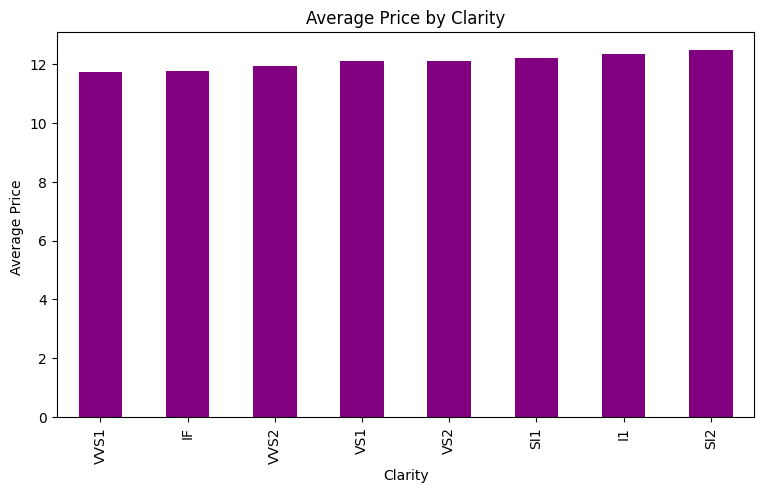

In [199]:
# Average price by Clarity
plt.figure(figsize=(9,5))
diamond.groupby('clarity')['price_inr'].mean().sort_values().plot(kind='bar', color='purple')
plt.title("Average Price by Clarity")
plt.xlabel("Clarity")
plt.ylabel("Average Price ")
plt.show()


In [200]:
#Creare volume
diamond['volume'] = diamond['x']*diamond['y']*diamond['z']

# Diamond price per carat
diamond['price_per_carat'] = diamond['price_inr']/diamond['carat']

#Diamension ratio
diamond['dim_ratio'] = (diamond['x'] + diamond['y'])/(2*diamond['z'])


In [201]:
# carat catogory

def carat_cat(c):
    if c < 0.5: return 'Light'
    elif c <= 1.5: return 'Medium'
    else: return 'Heavy'
diamond['carat_cat'] = diamond['carat'].apply(carat_cat)


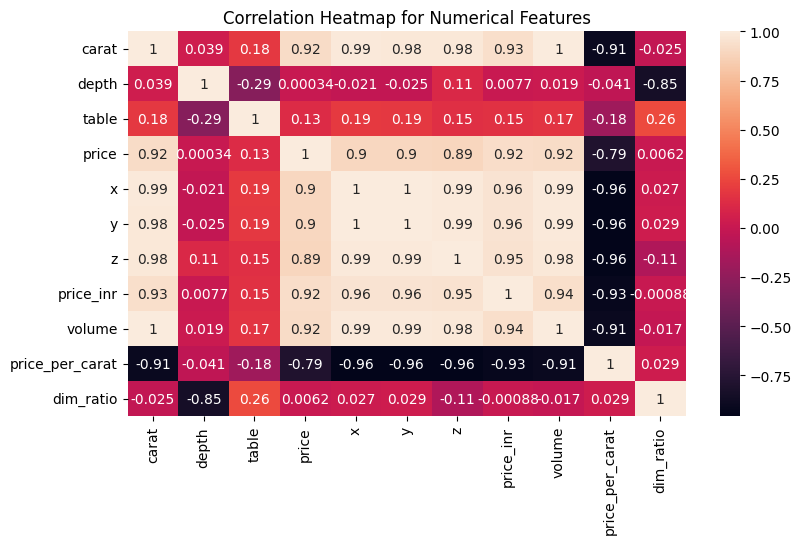

In [202]:
# Select only numeric columns
numeric_cols = diamond.select_dtypes(include=['int64','float64']).columns


# Compute correlation matrix
corr_matrix = diamond[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap for Numerical Features")
plt.show()




In [203]:
features = ['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity']


In [204]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode ordinal
le_cut = LabelEncoder()
le_clarity = LabelEncoder()

diamond['cut'] = le_cut.fit_transform(diamond['cut'])
diamond['clarity'] = le_clarity.fit_transform(diamond['clarity'])

# One‑hot encode color
diamond = pd.get_dummies(diamond, columns=['color'], drop_first=True)

diamond.head()


,carat,cut,clarity,depth,table,price,x,y,z,price_inr,volume,price_per_carat,dim_ratio,carat_cat,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,2,3,61.5,55.0,326,3.95,3.98,2.43,10.281170,38.202030,44.700740,1.631687,Light,True,False,False,False,False,False
1,0.21,3,2,59.8,61.0,326,3.89,3.84,2.31,10.281170,34.505856,48.957954,1.673160,Light,True,False,False,False,False,False
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31,10.284233,38.076885,44.714056,1.757576,Light,True,False,False,False,False,False
3,0.29,3,5,62.4,58.0,334,4.20,4.23,2.63,10.305413,46.724580,35.535907,1.602662,Light,False,False,False,False,True,False
4,0.31,1,3,63.3,58.0,335,4.34,4.35,2.75,10.308403,51.917250,33.252911,1.580000,Light,False,False,False,False,False,True


In [205]:
# Target
y = diamond['price_inr']

# Feature set
X = diamond.drop(columns=['price_inr', 'price','table','depth']) 

#  Encode categoricals simply 
X = pd.get_dummies(X, drop_first=True)



In [206]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [207]:
#  Helper to evaluate models
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, mse, rmse, r2))

# List to store scores
results = []


In [208]:
#  Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model(lr, "Linear Regression")


In [209]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
evaluate_model(dt, "Decision Tree")


In [210]:
# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, "Random Forest")


In [211]:
#  KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model(knn, "KNN")


In [212]:
#  XGBoost Regressor
xgb = XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=500, learning_rate=0.05, 
    max_depth=5, subsample=0.8, colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)
evaluate_model(xgb, "XGBoost")



In [213]:
#  ANN Model (Neural Network)
ann = Sequential()
ann.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
ann.add(Dense(64, activation='relu'))
ann.add(Dense(1))

ann.compile(optimizer='adam', loss='mse')
ann.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)



In [214]:
# ANN prediction + metrics
y_pred_ann = ann.predict(X_test).flatten()
results.append((
    "ANN",
    mean_absolute_error(y_test, y_pred_ann),
    mean_squared_error(y_test, y_pred_ann),
    np.sqrt(mean_squared_error(y_test, y_pred_ann)),
    r2_score(y_test, y_pred_ann)
))



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [215]:
#  Show results
results_df = pd.DataFrame(results, columns=['Model','MAE','MSE','RMSE','R2'])
print(results_df.sort_values(by='RMSE'))



               Model       MAE       MSE      RMSE        R2
2      Random Forest  0.037240  0.004054  0.063669  0.995207
4            XGBoost  0.056589  0.006199  0.078735  0.992670
1      Decision Tree  0.048936  0.008283  0.091011  0.990206
5                ANN  0.086084  0.013542  0.116370  0.983988
3                KNN  0.086392  0.015041  0.122641  0.982215
0  Linear Regression  0.131063  0.030221  0.173841  0.964267


In [216]:
# Save Best Model
best_model_name = results_df.sort_values(by='RMSE').iloc[0]['Model']
print("Best performing model:", best_model_name)

if best_model_name == "Random Forest":
    best_model = rf
elif best_model_name == "XGBoost":
    best_model = xgb
elif best_model_name == "Linear Regression":
    best_model = lr
elif best_model_name == "Decision Tree":
    best_model = dt
elif best_model_name == "KNN":
    best_model = knn
else:
    best_model = ann  



Best performing model: Random Forest


In [217]:
# save pickle

with open("best_reg_model.pkl", "wb") as f:
  pickle.dump(best_model, f)
print("Saved model to best_reg_model.pkl")




Saved model to best_reg_model.pkl


In [224]:
# Clustering
cluster_features = [
    'carat', 'depth', 'table', 'price_inr', 'x', 'y', 'z',
    'volume', 'price_per_carat', 'dim_ratio',
    'color_E','color_F','color_G','color_H','color_I','color_J'
]


In [225]:
# Standardscaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(diamond[cluster_features])


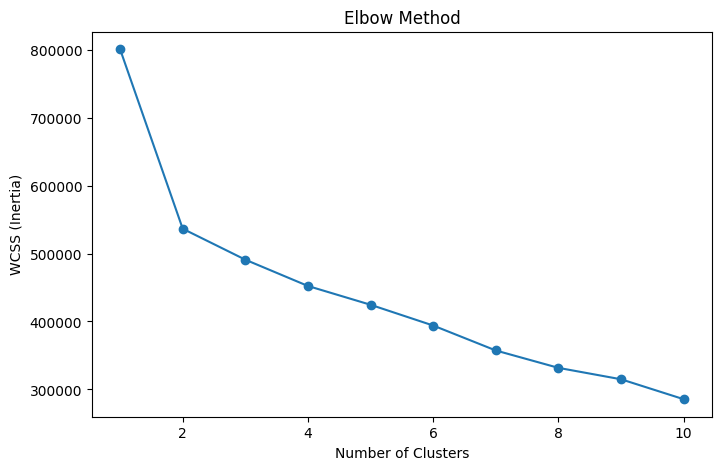

In [226]:


#Elbow method

wcss = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.show()


In [227]:
k_optimal =2
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
diamond['cluster'] = kmeans.fit_predict(X_scaled)


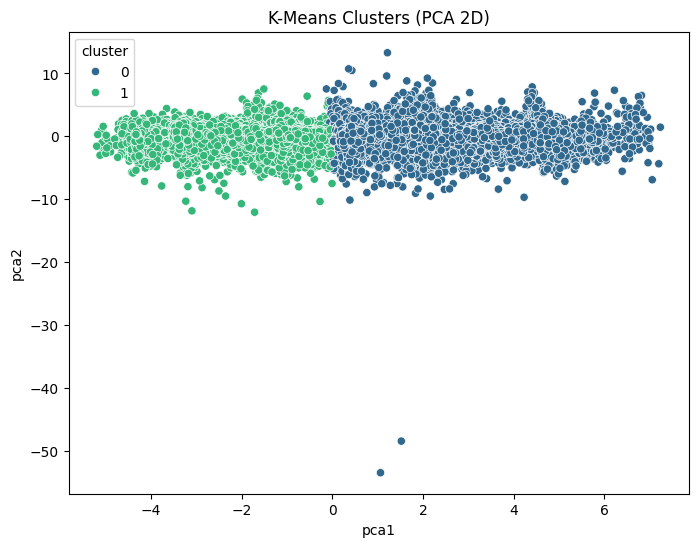

In [228]:
#pca
from sklearn.decomposition import PCA


pca = PCA(n_components=2, random_state=42)
pca_comp = pca.fit_transform(X_scaled)

diamond['pca1'] = pca_comp[:, 0]
diamond['pca2'] = pca_comp[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', palette='viridis', data=diamond)
plt.title("K-Means Clusters (PCA 2D)")
plt.show()


In [229]:
cluster_summary = diamond.groupby('cluster').agg(
    avg_price=('price_inr', 'mean'),
    avg_carat=('carat', 'mean'),
    most_common_cut=('cut', lambda x: x.mode()[0] if not x.mode().empty else None)
)

print(cluster_summary)


         avg_price  avg_carat  most_common_cut
cluster                                       
0        12.936148   1.030132                2
1        11.352019   0.402127                2


In [230]:


with open("best_clustering_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)
